In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [2]:
## Load dataset
Churn_DF=pd.read_csv(r"C:\Users\HP\Desktop\Data Science\Assignments\Flask Assignment\Churn_prediction\churn.csv")
Churn_DF

churn  accountlength internationalplan voicemailplan  \
0       No            128                no           yes   
1       No            107                no           yes   
2       No            137                no            no   
3       No             84               yes            no   
4       No             75               yes            no   
...    ...            ...               ...           ...   
4995    No             50                no           yes   
4996   Yes            152                no            no   
4997    No             61                no            no   
4998    No            109                no            no   
4999    No             86                no           yes   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
0                      25            265.1            110           45.07   
1                      26            161.6            123           27.47   
2                       0            243.4            114           41.38   
3                       0            299.4             71           50.90   
4                       0            166.7            113           28.34   
...                   ...              ...            ...             ...   
4995                   40            235.7            127           40.07   
4996                    0            184.2             90           31.31   
4997                    0            140.6             89           23.90   
4998                    0            188.8             67           32.10   
4999                   34            129.4            102           22.00   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
0               197.4             99           16.78              244.7   
1               195.5            103           16.62              254.4   
2               121.2            110           10.30              162.6   
3                61.9             88            5.26              196.9   
4               148.3            122           12.61              186.9   
...               ...            ...             ...                ...   
4995            223.0            126           18.96              297.5   
4996            256.8             73           21.83              213.6   
4997            172.8            128           14.69              212.4   
4998            171.7             92           14.59              224.4   
4999            267.1            104           22.70              154.8   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
0                  91             11.01              10.0               3   
1                 103             11.45              13.7               3   
2                 104              7.32              12.2               5   
3                  89              8.86               6.6               7   
4                 121              8.41              10.1               3   
...               ...               ...               ...             ...   
4995              116             13.39               9.9               5   
4996              113              9.61              14.7               2   
4997               97              9.56              13.6               4   
4998               89             10.10               8.5               6   
4999              100              6.97               9.3              16   

      totalintlcharge  numbercustomerservicecalls  
0                2.70                           1  
1                3.70                           1  
2                3.29                           0  
3                1.78                           2  
4                2.73                           3  
...               ...                         ...  
4995             2.67                           2  
4996             3.97                           3  
4997             3.67                           1  
4

In [3]:
## Encode the features categorical to numerical
LB_encoder=LabelEncoder()
Churn_DF["internationalplan"]=pd.DataFrame(LB_encoder.fit_transform(Churn_DF["internationalplan"]))
Churn_DF["voicemailplan"]=pd.DataFrame(LB_encoder.fit_transform(Churn_DF["voicemailplan"]))
Churn_DF["churn"]=pd.DataFrame(LB_encoder.fit_transform(Churn_DF["churn"]))

In [4]:
Churn_DF

churn  accountlength  internationalplan  voicemailplan  \
0         0            128                  0              1   
1         0            107                  0              1   
2         0            137                  0              0   
3         0             84                  1              0   
4         0             75                  1              0   
...     ...            ...                ...            ...   
4995      0             50                  0              1   
4996      1            152                  0              0   
4997      0             61                  0              0   
4998      0            109                  0              0   
4999      0             86                  0              1   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
0                      25            265.1            110           45.07   
1                      26            161.6            123           27.47   
2                       0            243.4            114           41.38   
3                       0            299.4             71           50.90   
4                       0            166.7            113           28.34   
...                   ...              ...            ...             ...   
4995                   40            235.7            127           40.07   
4996                    0            184.2             90           31.31   
4997                    0            140.6             89           23.90   
4998                    0            188.8             67           32.10   
4999                   34            129.4            102           22.00   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
0               197.4             99           16.78              244.7   
1               195.5            103           16.62              254.4   
2               121.2            110           10.30              162.6   
3                61.9             88            5.26              196.9   
4               148.3            122           12.61              186.9   
...               ...            ...             ...                ...   
4995            223.0            126           18.96              297.5   
4996            256.8             73           21.83              213.6   
4997            172.8            128           14.69              212.4   
4998            171.7             92           14.59              224.4   
4999            267.1            104           22.70              154.8   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
0                  91             11.01              10.0               3   
1                 103             11.45              13.7               3   
2                 104              7.32              12.2               5   
3                  89              8.86               6.6               7   
4                 121              8.41              10.1               3   
...               ...               ...               ...             ...   
4995              116             13.39               9.9               5   
4996              113              9.61              14.7               2   
4997               97              9.56              13.6               4   
4998               89             10.10               8.5               6   
4999              100              6.97               9.3              16   

      totalintlcharge  numbercustomerservicecalls  
0                2.70                           1  
1                3.70                           1  
2                3.29                           0  
3                1.78                           2  
4                2.73                           3  
...               ...                         ...  
4995             2.67                           2  
4996             3.97                           3  
4997             3

In [5]:
## Perform EDA 
Churn_DF.isnull().sum()   # check null value

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [6]:
Churn_DF.shape         # check rows & columns value count

(5000, 18)

In [7]:
Churn_DF.duplicated().value_counts()       # check duplicate count

False    5000
dtype: int64

In [8]:
Churn_DF.describe()        # describe the dataset

churn  accountlength  internationalplan  voicemailplan  \
count  5000.000000     5000.00000        5000.000000    5000.000000   
mean      0.141400      100.25860           0.094600       0.264600   
std       0.348469       39.69456           0.292691       0.441164   
min       0.000000        1.00000           0.000000       0.000000   
25%       0.000000       73.00000           0.000000       0.000000   
50%       0.000000      100.00000           0.000000       0.000000   
75%       0.000000      127.00000           0.000000       1.000000   
max       1.000000      243.00000           1.000000       1.000000   

       numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
count          5000.000000      5000.000000    5000.000000     5000.000000   
mean              7.755200       180.288900     100.029400       30.649668   
std              13.546393        53.894699      19.831197        9.162069   
min               0.000000         0.000000       0.000000        0.000000   
25%               0.000000       143.700000      87.000000       24.430000   
50%               0.000000       180.100000     100.000000       30.620000   
75%              17.000000       216.200000     113.000000       36.750000   
max              52.000000       351.500000     165.000000       59.760000   

       totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
count      5000.000000    5000.000000     5000.000000        5000.000000   
mean        200.636560     100.191000       17.054322         200.391620   
std          50.551309      19.826496        4.296843          50.527789   
min           0.000000       0.000000        0.000000           0.000000   
25%         166.375000      87.000000       14.140000         166.900000   
50%         201.000000     100.000000       17.090000         200.400000   
75%         234.100000     114.000000       19.900000         234.700000   
max         363.700000     170.000000       30.910000         395.000000   

       totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
count      5000.000000       5000.000000       5000.000000     5000.000000   
mean         99.919200          9.017732         10.261780        4.435200   
std          19.958686          2.273763          2.761396        2.456788   
min           0.000000          0.000000          0.000000        0.000000   
25%          87.000000          7.510000          8.500000        3.000000   
50%         100.000000          9.020000         10.300000        4.000000   
75%         113.000000         10.560000         12.000000        6.000000   
max         175.000000         17.770000         20.000000       20.000000   

       totalintlcharge  numbercustomerservicecalls  
count      5000.000000                 5000.000000  
mean          2.771196                    1.570400  
std           0.745514                    1.306363  
min           0.000000                    0.000000  
25%           2.300000                    1.000000  
50%           2.780000                    1.000000  
75%           3.240000                    2.000000  
max           5.400000                    9.000000

In [9]:
Churn_DF.info()         # check data type details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   int32  
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   int32  
 3   voicemailplan               5000 non-null   int32  
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [10]:
Churn_DF.corr()        # check correlation between features

churn  accountlength  internationalplan  \
churn                       1.000000       0.021203           0.259123   
accountlength               0.021203       1.000000           0.014681   
internationalplan           0.259123       0.014681           1.000000   
voicemailplan              -0.110698      -0.006650           0.009054   
numbervmailmessages        -0.097633      -0.014575           0.011947   
totaldayminutes             0.207705      -0.001017           0.028138   
totaldaycalls               0.016130       0.028240           0.008102   
totaldaycharge              0.207700      -0.001019           0.028141   
totaleveminutes             0.089288      -0.009591           0.021235   
totalevecalls              -0.006284       0.009143           0.002505   
totalevecharge              0.089282      -0.009587           0.021234   
totalnightminutes           0.045677       0.000668          -0.026508   
totalnightcalls            -0.006986      -0.007825           0.005623   
totalnightcharge            0.045673       0.000656          -0.026510   
totalintlminutes            0.063285       0.001291           0.031799   
totalintlcalls             -0.046893       0.014277           0.004493   
totalintlcharge             0.063275       0.001292           0.031751   
numbercustomerservicecalls  0.212564      -0.001445          -0.012974   

                            voicemailplan  numbervmailmessages  \
churn                           -0.110698            -0.097633   
accountlength                   -0.006650            -0.014575   
internationalplan                0.009054             0.011947   
voicemailplan                    1.000000             0.954508   
numbervmailmessages              0.954508             1.000000   
totaldayminutes                  0.002059             0.005381   
totaldaycalls                   -0.001735             0.000883   
totaldaycharge                   0.002056             0.005377   
totaleveminutes                  0.023328             0.019490   
totalevecalls                   -0.005916            -0.003954   
totalevecharge                   0.023332             0.019496   
totalnightminutes                0.005524             0.005541   
totalnightcalls                  0.009176             0.002676   
totalnightcharge                 0.005522             0.005535   
totalintlminutes                 0.004116             0.002463   
totalintlcalls                  -0.007525             0.000124   
totalintlcharge                  0.004165             0.002505   
numbercustomerservicecalls      -0.014453            -0.007086   

                            totaldayminutes  totaldaycalls  totaldaycharge  \
churn                              0.207705       0.016130        0.207700   
accountlength                     -0.001017       0.028240       -0.001019   
internationalplan                  0.028138       0.008102        0.028141   
voicemailplan                      0.002059      -0.001735        0.002056   
numbervmailmessages                0.005381       0.000883        0.005377   
totaldayminutes                    1.000000       0.001935        1.000000   
totaldaycalls                      0.001935       1.000000        0.001936   
totaldaycharge                     1.000000       0.001936        1.000000   
totaleveminutes                   -0.010750      -0.000699       -0.010747   
totalevecalls                      0.008128       0.003754        0.008129   
totalevecharge                    -0.010760      -0.000695       -0.010757   
totalnightminutes                  0.011799       0.002804        0.011801   
totalnightcalls                    0.004236      -0.008308        0.004235   
totalnightcharge                   0.011783       0.002802        0.011785   
totalintlminutes                  -0.019486       0.013097       -0.019490   
totalintlcalls                    -0.001303       0.010893       -0.001307   
totalintlcharge                   -0.019415

<AxesSubplot:>

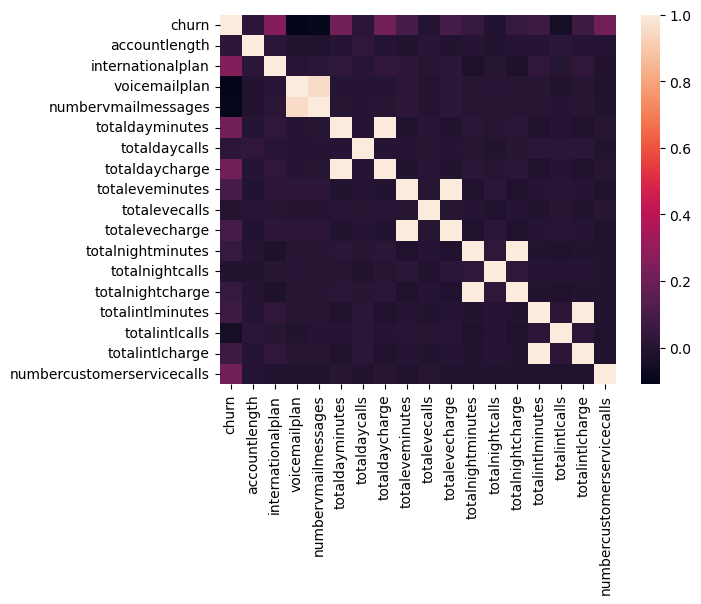

In [11]:
sns.heatmap(Churn_DF.corr())     # visualize the features

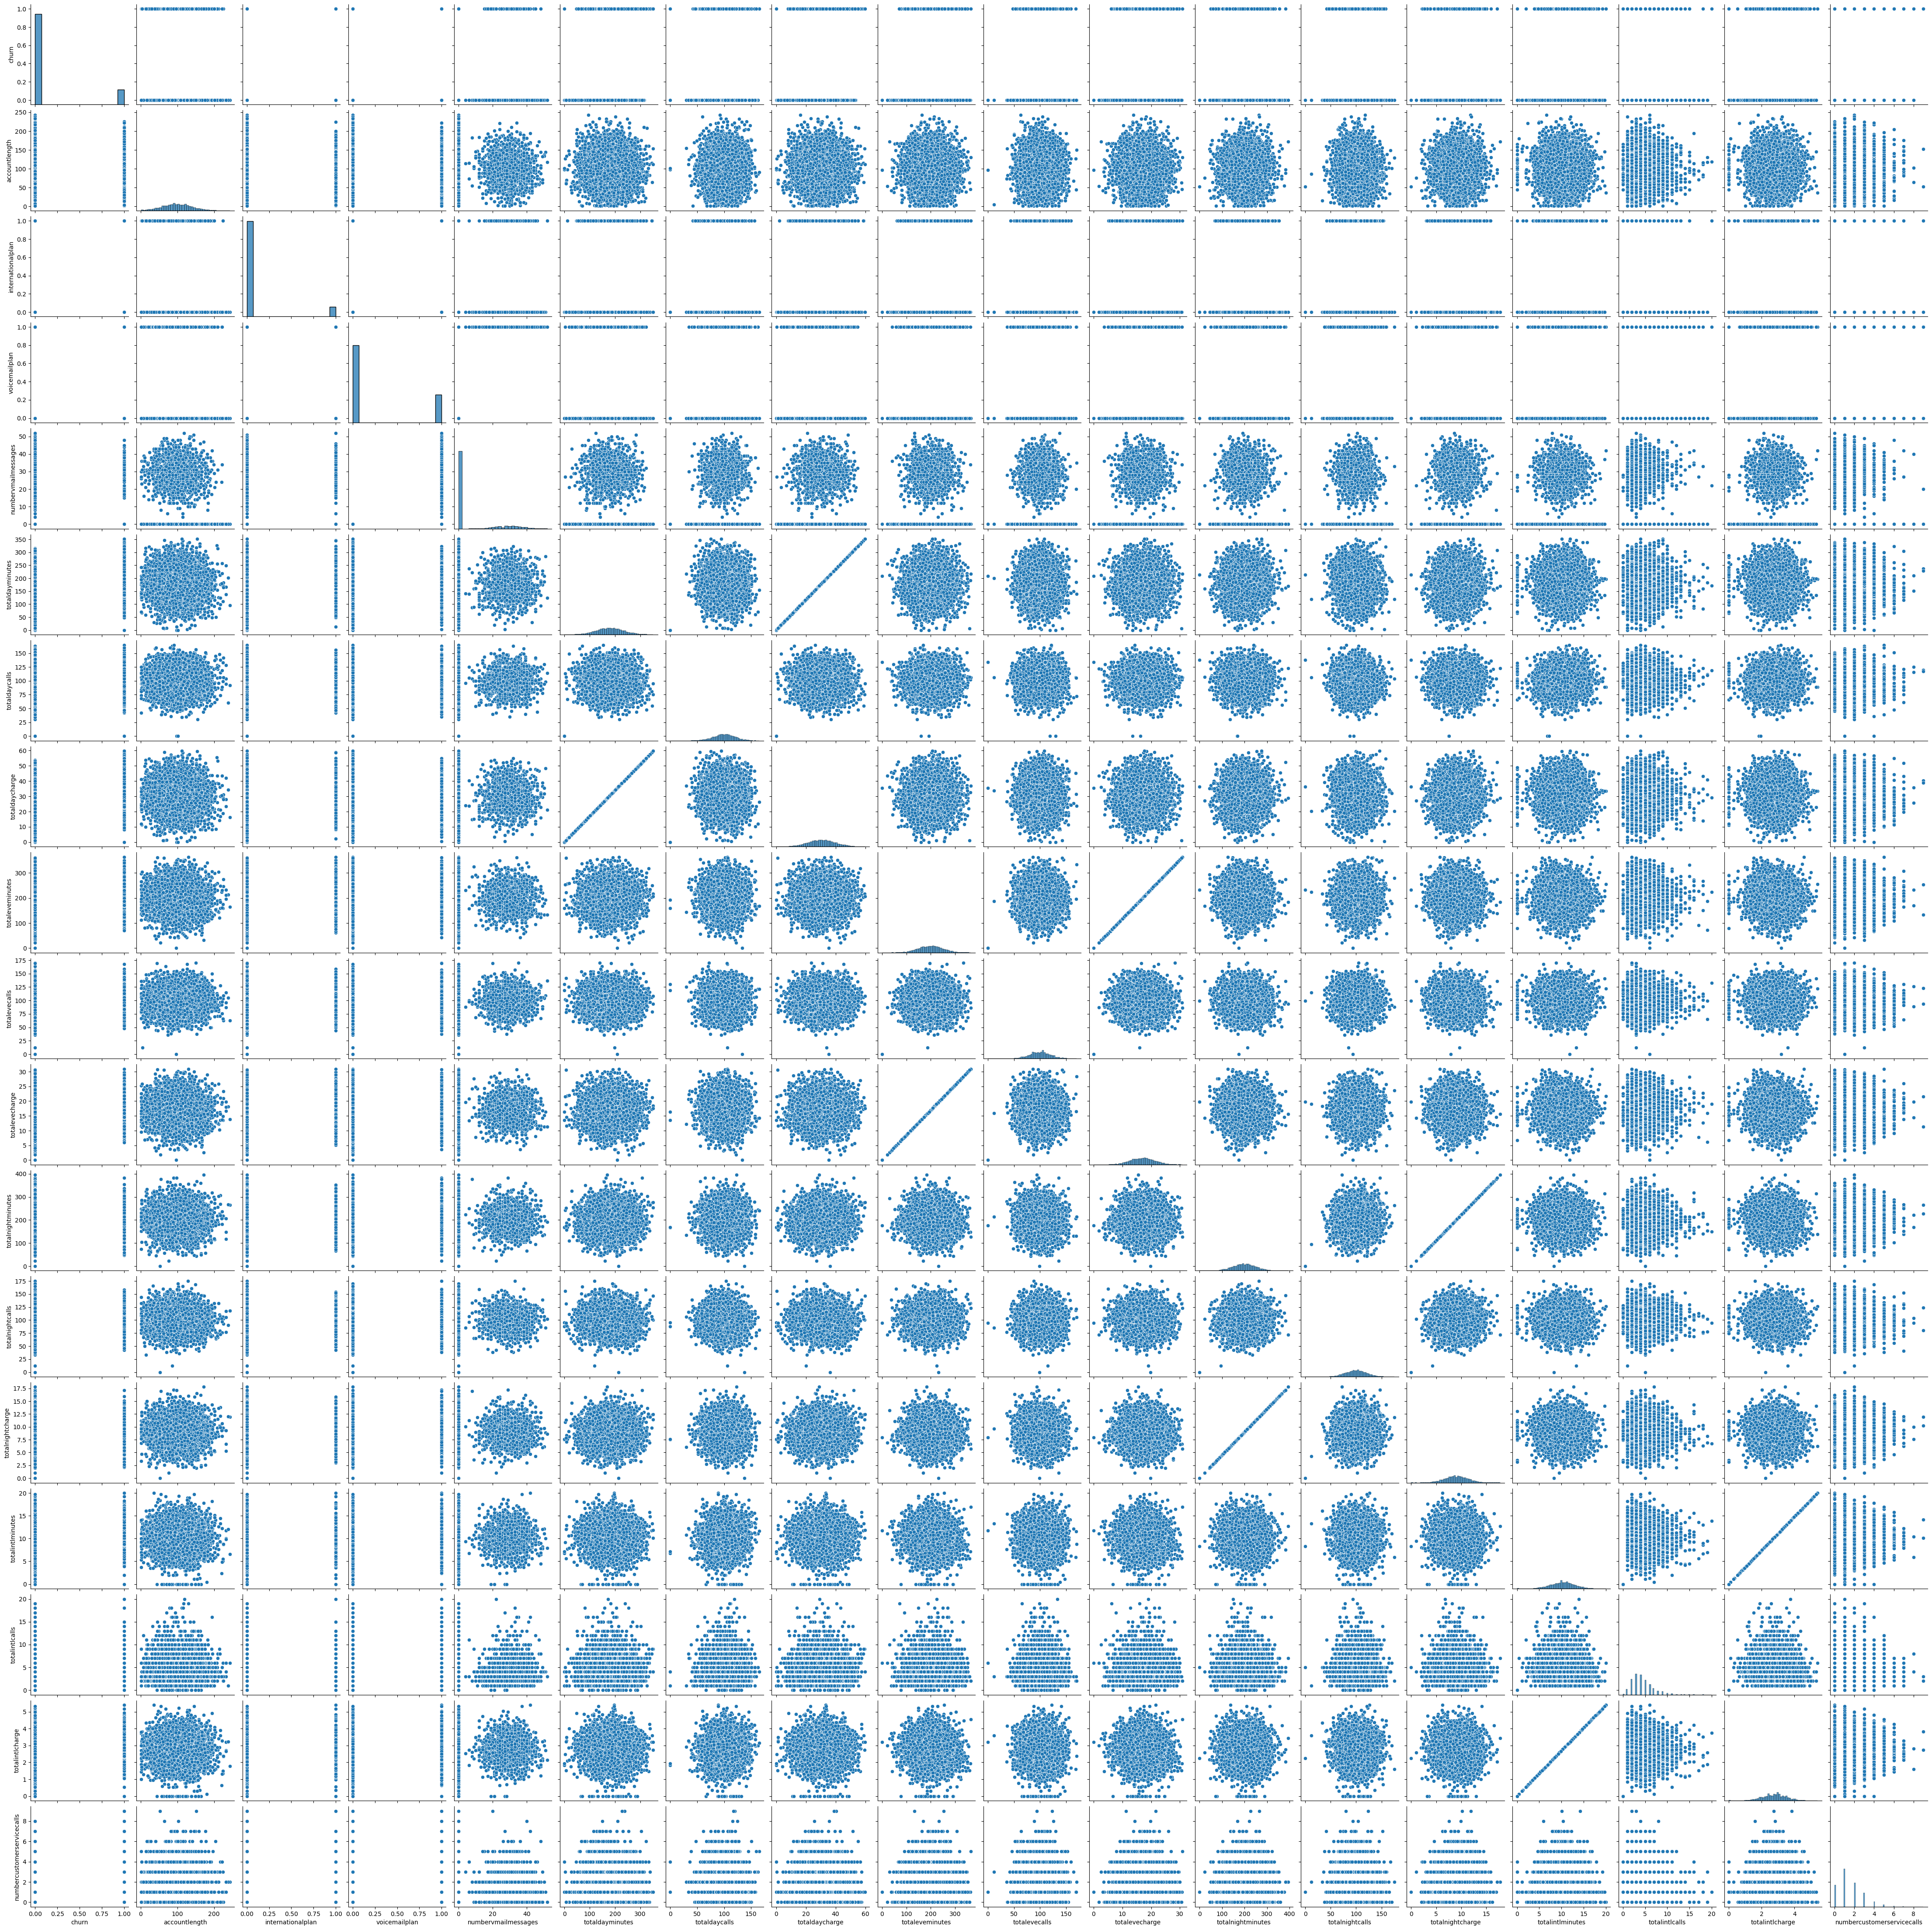

In [12]:
sns.pairplot(data=Churn_DF)     # visualize the data set 

<AxesSubplot:>

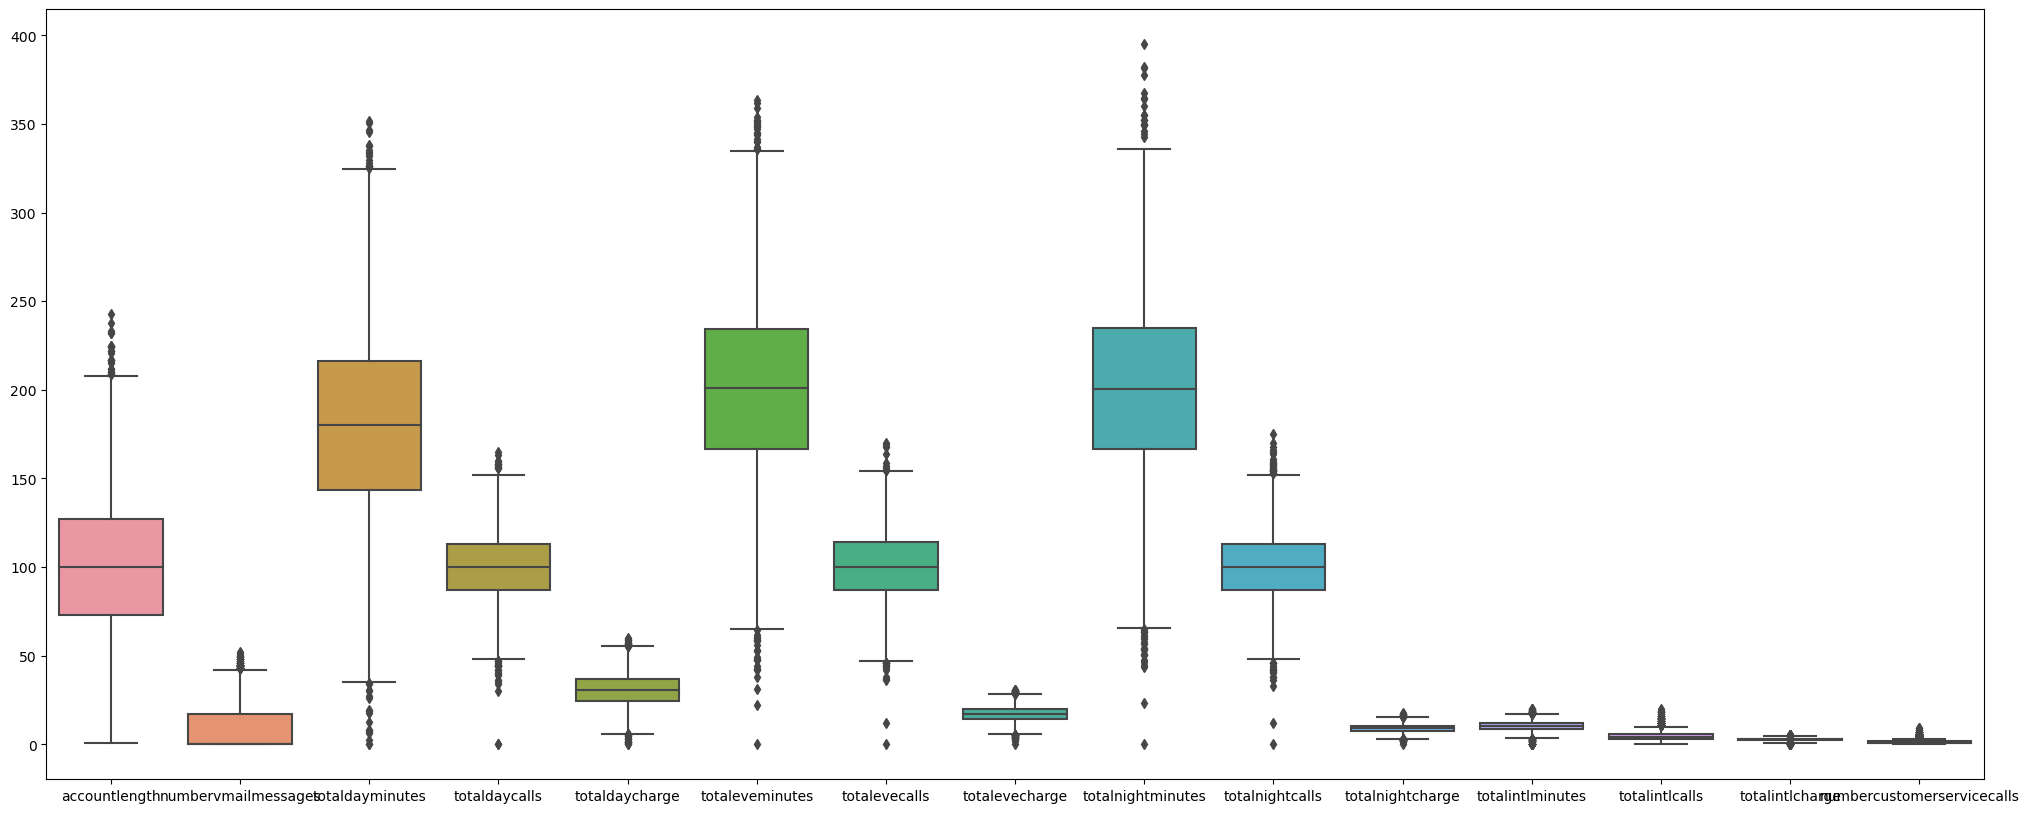

In [12]:
plt.figure(figsize=(25,10))
sns.boxplot(data=Churn_DF.drop(["churn","internationalplan","voicemailplan"],axis=1))    # check outlier in dataset

In [13]:
## Identify X & Y
X=Churn_DF.iloc[:,1:]
Y=Churn_DF.iloc[:,0:1]

In [14]:
## Split the dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.70,random_state=55,stratify=Churn_DF.churn)
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.77      0.68      0.72       212

    accuracy                           0.93      1500
   macro avg       0.86      0.82      0.84      1500
weighted avg       0.92      0.93      0.92      1500



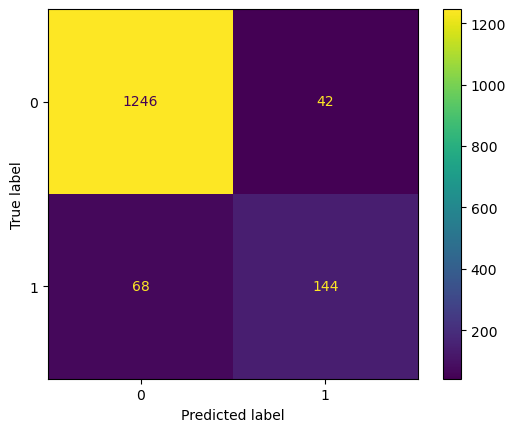

In [15]:
metrics.plot_confusion_matrix(DT,x_test,y_test)

In [16]:
Churn_DF.columns

Index(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

In [17]:
Churn_DF.describe()

churn  accountlength  internationalplan  voicemailplan  \
count  5000.000000     5000.00000        5000.000000    5000.000000   
mean      0.141400      100.25860           0.094600       0.264600   
std       0.348469       39.69456           0.292691       0.441164   
min       0.000000        1.00000           0.000000       0.000000   
25%       0.000000       73.00000           0.000000       0.000000   
50%       0.000000      100.00000           0.000000       0.000000   
75%       0.000000      127.00000           0.000000       1.000000   
max       1.000000      243.00000           1.000000       1.000000   

       numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
count          5000.000000      5000.000000    5000.000000     5000.000000   
mean              7.755200       180.288900     100.029400       30.649668   
std              13.546393        53.894699      19.831197        9.162069   
min               0.000000         0.000000       0.000000        0.000000   
25%               0.000000       143.700000      87.000000       24.430000   
50%               0.000000       180.100000     100.000000       30.620000   
75%              17.000000       216.200000     113.000000       36.750000   
max              52.000000       351.500000     165.000000       59.760000   

       totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
count      5000.000000    5000.000000     5000.000000        5000.000000   
mean        200.636560     100.191000       17.054322         200.391620   
std          50.551309      19.826496        4.296843          50.527789   
min           0.000000       0.000000        0.000000           0.000000   
25%         166.375000      87.000000       14.140000         166.900000   
50%         201.000000     100.000000       17.090000         200.400000   
75%         234.100000     114.000000       19.900000         234.700000   
max         363.700000     170.000000       30.910000         395.000000   

       totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
count      5000.000000       5000.000000       5000.000000     5000.000000   
mean         99.919200          9.017732         10.261780        4.435200   
std          19.958686          2.273763          2.761396        2.456788   
min           0.000000          0.000000          0.000000        0.000000   
25%          87.000000          7.510000          8.500000        3.000000   
50%         100.000000          9.020000         10.300000        4.000000   
75%         113.000000         10.560000         12.000000        6.000000   
max         175.000000         17.770000         20.000000       20.000000   

       totalintlcharge  numbercustomerservicecalls  
count      5000.000000                 5000.000000  
mean          2.771196                    1.570400  
std           0.745514                    1.306363  
min           0.000000                    0.000000  
25%           2.300000                    1.000000  
50%           2.780000                    1.000000  
75%           3.240000                    2.000000  
max           5.400000                    9.000000

In [18]:
DT.predict([[61,0,0,0,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1]])

array([0])

In [19]:
DT.predict([[152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3]])

array([1])

In [20]:
# store this model in pickle file uisng LG 
pickle.dump(DT, open('model.pkl', 'wb'))